In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
#Filter years to 2000-2019
df2 = df[(df['Year']>=2010.0) & (df['Year']<=2019.0)]

In [23]:
df2.Genre.value_counts()

Action          1440
Sports           570
Misc             563
Role-Playing     558
Adventure        543
Shooter          395
Racing           234
Simulation       209
Fighting         197
Strategy         168
Platform         151
Puzzle           116
Name: Genre, dtype: int64

In [24]:
pro = df2.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)[:40]

In [25]:
pro

Genre
Action          673.50
Shooter         462.80
Sports          324.80
Role-Playing    305.72
Misc            238.05
Racing          123.69
Platform        120.69
Fighting         82.08
Simulation       71.04
Adventure        61.05
Strategy         35.90
Puzzle           21.24
Name: Global_Sales, dtype: float64

In [26]:
progs = pd.DataFrame(
        [
        ['Action',1,673.50],
        ['Sports',2,324.80],
        ['Shooter',3,462.80],
        ['Roleplaying',4,305.72],
        ['Platform',5,120.69],
            ['Misc',6,238.05],
            ['Racing',7,123.69],
            ['Fighting',8,82.08],
            ['Simulation',9,71.04],
            ['Puzzle',10,21.24],
            ['Adventure',11,61.05],
            ['Strategy',12,35.90]
    ],
index=["Action", "Sports", "Shooter", "Role-Playing", "Platform", "Misc", "Racing", "Fighting", "Simulation", "Puzzle", "Adventure", "Strategy"],
columns=['Genre','Level','GLSales'])

In [27]:
X = progs.iloc[:, 1:-1].values
y = progs.iloc[:, -1].values

In [28]:
progs

,Genre,Level,GLSales
Action,Action,1,673.50
Sports,Sports,2,324.80
Shooter,Shooter,3,462.80
Role-Playing,Roleplaying,4,305.72
Platform,Platform,5,120.69
Misc,Misc,6,238.05
Racing,Racing,7,123.69
Fighting,Fighting,8,82.08
Simulation,Simulation,9,71.04
Puzzle,Puzzle,10,21.24


In [29]:
X
y

array([673.5 , 324.8 , 462.8 , 305.72, 120.69, 238.05, 123.69,  82.08,
        71.04,  21.24,  61.05,  35.9 ])

In [30]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)

In [31]:
# Ska använda RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)

In [33]:
regressor.fit(X, y)

RandomForestRegressor(n_estimators=12, random_state=0)

In [34]:

regressor.predict([[6.5]])


array([405.3])

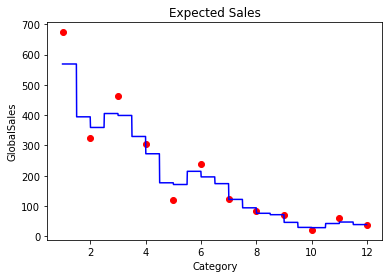

In [35]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Expected Sales')
plt.xlabel('Category')
plt.ylabel('GlobalSales')
plt.show()


# Om vi väljer Category 6 = misc and estimate the predicated sales for the last 9 years we can devide it by 9

In [36]:
405300000 / 9

45033333.333333336

## and devide by the number of Misc created in the last 9 years 

In [37]:
21459916 / 563

38117.079928952044

## The estimated sales for a Misc game published worldwide would be : 38117 for 1 year